<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [2]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 
import os
import re

from functools import reduce 
from collections import defaultdict

import prophet as pr

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'match_result_test.csv',
 'sales_data_with_stores.csv',
 'groceries.csv',
 'sample-sales-data.csv',
 'scanner_data.csv',
 'sales_vs_discount.csv',
 'sales.csv',
 'test.csv',
 'bz_data_analyis.csv',
 'online_retail.xlsx',
 'mock_sales_data.csv',
 '1_orders_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_customers_dataset.csv',
 'ecommerce-data.csv',
 'mall_customers.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'online_retail_II.xlsx',
 '1_order_payments_dataset.csv',
 'sample_data']

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [22]:
df = sns.load_dataset('taxis')
df['pickup'] = df['pickup'].to_numpy().astype('datetime64[ns]')
df['dropoff'] = df['dropoff'].to_numpy().astype('datetime64[ns]')
df['diff'] = (df['dropoff'] - df['pickup']).astype('timedelta64[s]')
df['avg'] = df['distance']/df['diff']
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,diff,avg
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,375.0,0.004267
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,425.0,0.001859
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,444.0,0.003086
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1552.0,0.004961
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,572.0,0.003776


In [34]:
cnt = df.groupby(['pickup_zone', 'dropoff_zone'])['avg', 'distance'].mean().reset_index()
cnt.head()

<ipython-input-34-58716cfc543f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,pickup_zone,dropoff_zone,avg,distance
0,Allerton/Pelham Gardens,Clinton Hill,0.007335,20.51
1,Allerton/Pelham Gardens,Co-Op City,0.004293,2.58
2,Alphabet City,East Village,0.002465,1.22
3,Alphabet City,Greenwich Village North,0.002500,1.90
4,Alphabet City,Greenwich Village South,0.002128,1.16


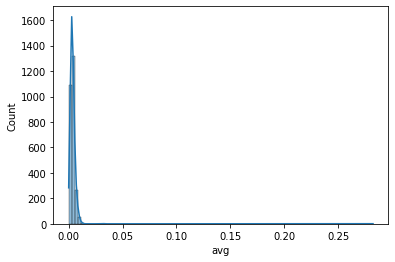

In [32]:
sns.histplot(data = cnt, x = 'avg', kde = True, bins = 100)

In [36]:
df[df['avg']>=0.15]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,diff,avg
491,2019-03-07 07:11:33,2019-03-07 07:11:39,1,1.60,2.5,0.00,0.0,5.80,yellow,NaN,Murray Hill,Murray Hill,Manhattan,Manhattan,6.0,0.266667
770,2019-03-02 03:16:59,2019-03-02 03:17:06,0,9.40,2.5,0.00,0.0,3.80,yellow,NaN,JFK Airport,JFK Airport,Queens,Queens,7.0,1.342857
3241,2019-03-24 17:19:27,2019-03-24 17:19:29,1,0.34,65.0,13.06,0.0,78.36,yellow,credit card,Kew Gardens,NaN,Queens,NaN,2.0,0.170000
5284,2019-03-22 06:24:02,2019-03-22 06:24:11,1,1.70,2.5,0.00,0.0,5.80,yellow,NaN,Midtown North,Midtown North,Manhattan,Manhattan,9.0,0.188889
6089,2019-03-17 23:16:34,2019-03-17 23:16:52,1,10.10,12.0,0.00,0.0,12.00,green,credit card,Murray Hill-Queens,Murray Hill-Queens,Queens,Queens,18.0,0.561111


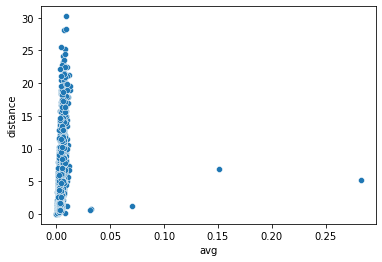

In [35]:
sns.scatterplot(data = cnt, x = 'avg', y = 'distance')

In [41]:
print(df['pickup'].min(), '~', df['pickup'].max())

2019-02-28 23:29:03 ~ 2019-03-31 23:43:45


# Iterators

In [42]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [43]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}